<div class="alert alert-block alert-info"><center><b>
Coding Manual Silhouette Score <br>
By Haidhi Angkawijana Tedja <br>
ITTS tangsel <br>
https://youtu.be/ctL6vpRlMfE
</b>
</center>
</div>

In [1]:
import warnings 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

# Dataset 

In [2]:
df = pd.read_csv('StudentsPerformance.csv')
print(f'Rows : {df.shape[0]}')
df.head()

Rows : 1000


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


I just take two variables only: Math and Reading score

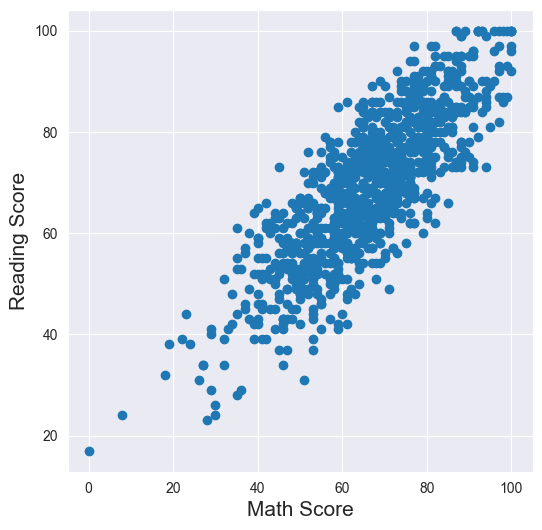

In [3]:
plt.figure(figsize=(6,6))
plt.scatter(df['math score'], df['reading score'])
plt.xlabel('Math Score', fontsize=15) 
plt.ylabel('Reading Score', fontsize=15)
plt.show()

# Silhouette Score
\begin{align}
Silhouette = \frac{separation-cohesion}{max(cohesion, separation)}
\end{align}


**Cohesion** -> <br>


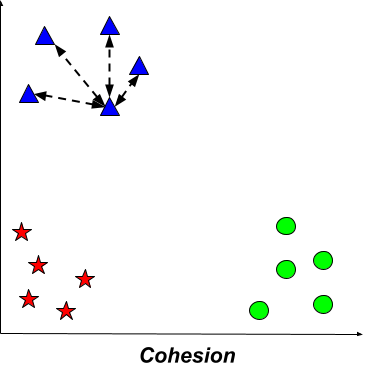

**Separation** <br>


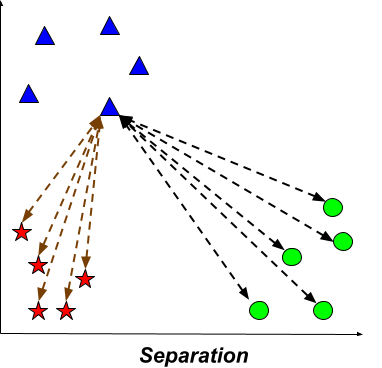

# Make Cluster

### Elbow Method

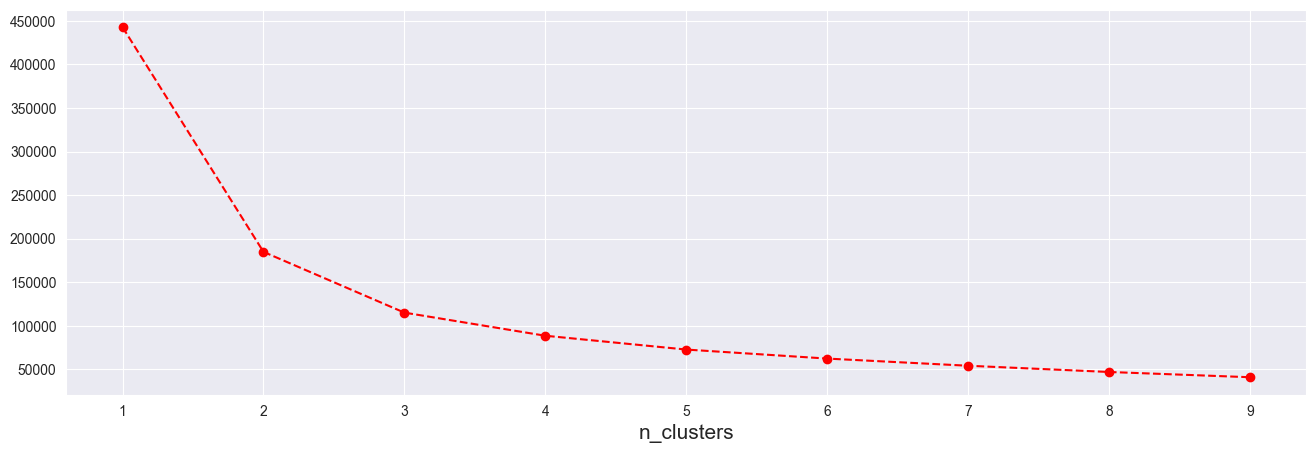

In [4]:
from sklearn.cluster import KMeans 

X = df[['math score', 'reading score']]

#jumlah clutser 
inertia = []

for k in range(1,10): 
    kmean = KMeans(n_clusters=k)
    kmean.fit(X)
    iner = kmean.inertia_ 
    inertia.append(iner)

plt.figure(figsize=(16,5))
plt.plot(range(1,10), inertia, 'r--', marker='o')
plt.xlabel('n_clusters', fontsize=15)
plt.show()


### Train

In [5]:
X = df[['math score', 'reading score']]
X_ori = X.copy()

model = KMeans(n_clusters=3)
model.fit(X)
label = model.predict(X)
X['label'] = label

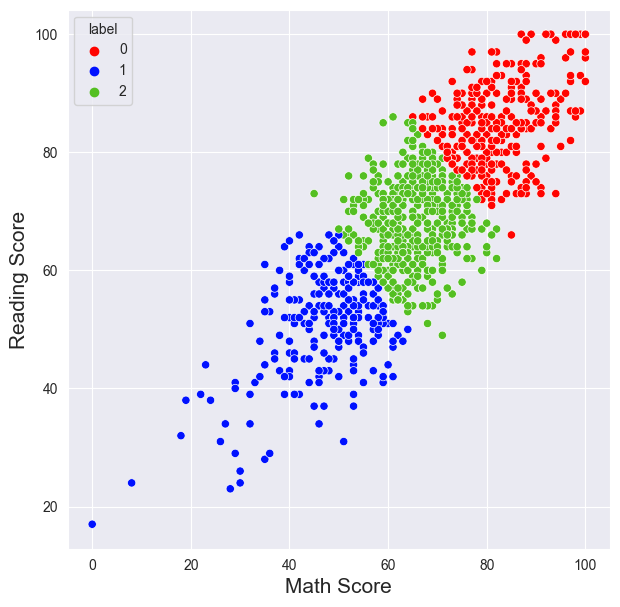

In [6]:
my_color = sns.color_palette(['#ff0400','#0011ff','#54bf22'])
plt.figure(figsize=(7,7))
sns.scatterplot(data=X, x='math score', y='reading score', hue='label', palette=my_color)
plt.xlabel('Math Score', fontsize=15) 
plt.ylabel('Reading Score', fontsize=15)
plt.show()

In [ ]:
X.head()

,math score,reading score,label
0,72,72,2
1,69,90,1
2,90,95,1
3,47,57,0
4,76,78,1


### Euclidean Distance Function

\begin{align}
dist = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}
\end{align}

In [7]:
def euclidean(arr1, arr2): 
  arr1 = np.array(arr1)
  arr2 = np.array(arr2) 

  distance = np.linalg.norm(arr1 - arr2)
  return distance 

### Merge 'math score' and 'reading score' on one tuple

In [8]:
X['distance'] = X[['math score', 'reading score']].apply(tuple, axis=1)
X.head()

,math score,reading score,label,distance
0,72,72,2,"(72, 72)"
1,69,90,0,"(69, 90)"
2,90,95,0,"(90, 95)"
3,47,57,1,"(47, 57)"
4,76,78,0,"(76, 78)"


### Get Random Sample

In [9]:
r = 30
random_p = X.loc[r] 
random_p

math score             69
reading score          74
label                   2
distance         (69, 74)
Name: 30, dtype: object

### Count Distance Between each Data and Random Data

In [10]:
X['distance from p'] = X.apply(lambda x: euclidean(x['distance'], random_p['distance']), axis=1)

In [11]:
X.head()

,math score,reading score,label,distance,distance from p
0,72,72,2,"(72, 72)",3.605551
1,69,90,0,"(69, 90)",16.000000
2,90,95,0,"(90, 95)",29.698485
3,47,57,1,"(47, 57)",27.802878
4,76,78,0,"(76, 78)",8.062258


### Count Cohesion Score

In [12]:
#Cohesion 
ai_data = X[X['label'] == random_p['label']]
cohesion = ai_data['distance from p'].mean()

In [13]:
print(f"Cohesion : {cohesion}")

Cohesion : 10.170241468567538


### Count Separation Score

In [14]:
#separation
bi_data = X[X['label'] != random_p['label']]

separation_list = []
for i in bi_data['label'].unique(): 
  sep = X[X['label'] == i] 
  separation = sep['distance from p'].mean()
  separation_list.append(separation)

In [15]:
print('Separation from each cluster')
print(separation_list)

Separation from each cluster
[18.426498949881523, 32.437925483196274]


In [16]:
print('Minimum Separation')
print(min(separation_list))

Minimum Separation
18.426498949881523


### Count Silhouette Score


In [17]:
#silhouette score 
ai = cohesion 
bi = min(separation_list)
silhouette = (bi - ai)/max(ai, bi)

In [18]:
print(f"Silhoutte Score From index {r} : {silhouette}")

Silhoutte Score From index 30 : 0.4480643612099232


### Let's count all Silhoutte from each data

In [19]:
silhouette_list = []
for i in range(0, len(X)): 
  random_p = X.loc[i] 
  X['distance from p'] = X.apply(lambda x: euclidean(x['distance'], random_p['distance']), axis=1) 

  #Cohesion 
  ai_data = X[X['label'] == random_p['label']]
  cohesion = ai_data['distance from p'].mean()
  
  #separation
  bi_data = X[X['label'] != random_p['label']]

  separation_list = []
  for i in bi_data['label'].unique(): 
    sep = X[X['label'] == i] 
    separation = sep['distance from p'].mean()
    separation_list.append(separation)
  
  #silhouette score 
  ai = cohesion 
  bi = min(separation_list)
  silhouette = (bi - ai)/max(ai, bi)
  silhouette_list.append(silhouette)

In [20]:
from sklearn.metrics import silhouette_score

silhouette_from_all_sample = np.mean(silhouette_list)
print(f'Manual Silhoutte Score : {silhouette_from_all_sample}')

silhouette_sklearn = silhouette_score(X_ori, label)
print(f'With Library : {silhouette_score(X_ori, label)}')

Manual Silhoutte Score : 0.4223906658765059
With Library : 0.4206535579874174


### silhouette score from each n_cluster (manual)

In [21]:
silhouette_for_all_n_cluster = []
for n in range(2, 11): 
  X = df[['math score', 'reading score']]
  model = KMeans(n_clusters=n) 
  model.fit(X)
  label = model.predict(X)
  X['label'] = label 

  X['distance'] = X[['math score', 'reading score']].apply(tuple, axis=1)

  silhouette_list = []
  for i in range(0, len(X)): 
    random_p = X.loc[i] 
    X['distance from p'] = X.apply(lambda x: euclidean(x['distance'], random_p['distance']), axis=1) 

    #Cohesion 
    ai_data = X[X['label'] == random_p['label']]
    cohesion = ai_data['distance from p'].mean()

    #separation
    bi_data = X[X['label'] != random_p['label']]

    separation_list = []
    for i in bi_data['label'].unique(): 
      sep = X[X['label'] == i] 
      separation = sep['distance from p'].mean()
      separation_list.append(separation)

    #silhouette score 
    ai = cohesion 
    bi = min(separation_list)
    silhouette = (bi - ai)/max(ai, bi)
    silhouette_list.append(silhouette)
  
  silhouette_mean_from_all_sample = np.mean(silhouette_list)
  silhouette_for_all_n_cluster.append(silhouette_mean_from_all_sample)

### silhouette score from each n_cluster (sklearn)

In [22]:
silhouette_for_all_n_cluster_sklearn = []
for n in range(2, 11): 
  X = df[['math score', 'reading score']]
  model = KMeans(n_clusters=n) 
  model.fit(X)
  label = model.predict(X)
  silhouette_for_all_n_cluster_sklearn.append(silhouette_score(X, label))

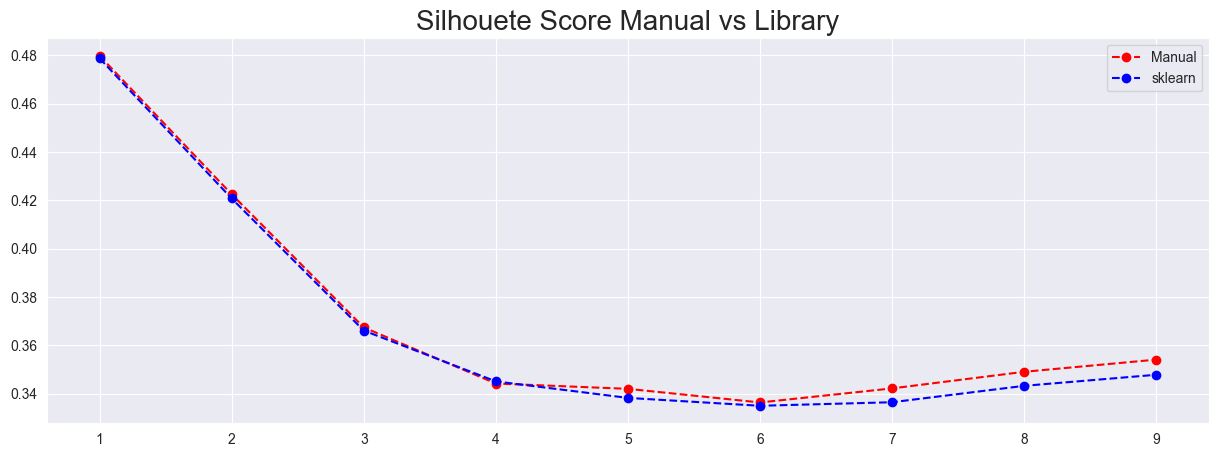

In [27]:
plt.figure(figsize=(15,5))
plt.plot(range(1,10), silhouette_for_all_n_cluster, 'r--', marker='o', label='Manual')
plt.plot(range(1,10), silhouette_for_all_n_cluster_sklearn, 'b--', marker='o', label='sklearn')
plt.title('Silhouete Score Manual vs Library', fontsize=20)
plt.legend()
plt.show()